In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#phase2: get the frames of the video of each part to convert it to frames

cap = cv2.VideoCapture("figure1.mp4")
i=0
while True:
    frame = cap.read()
    if frame[0]==False:
        break
    cv2.imwrite(f'frame{i}.jpg', frame[1])
    i=i+1


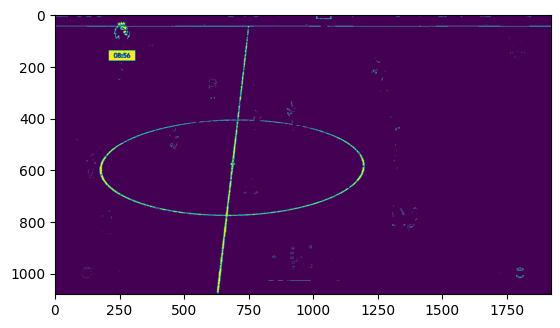

In [ ]:
img = cv2.imread('frame1.jpg')     #segmantion
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lower = np.array([112, 158, 115])
upper = np.array([179, 208, 183])
mask = cv2.inRange(img, lower, upper)

plt.subplot(1, 1, 1)
plt.imshow(mask)
plt.show()

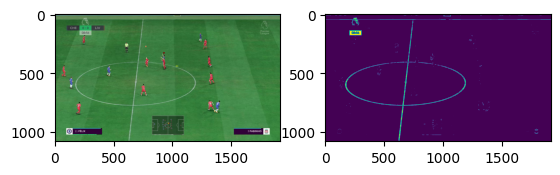

In [ ]:
img = cv2.imread('frame1.jpg')
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lower = np.array([112, 158, 115])
upper = np.array([179, 208, 183])
mask = cv2.inRange(img, lower, upper)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.show()

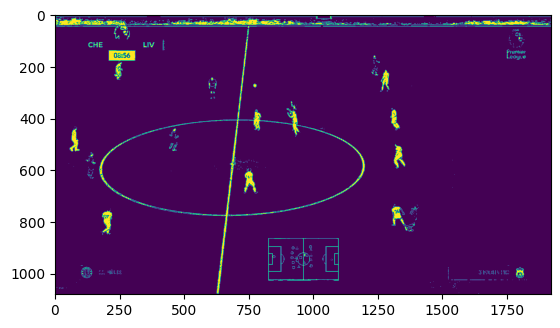

In [ ]:
group_color_lower =np.array((100,30,4))
group_color_upper =np.array((255,200,200))
mask_group1 = cv2.inRange(img, group_color_lower, group_color_upper)
plt.imshow(mask_group1)
plt.show()
# to make diff of the color of each group

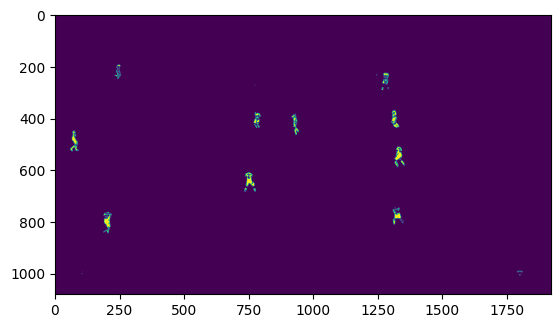

In [ ]:
group1_color_lower =np.array((130,40,3))
group1_color_upper =np.array((255,80,110))
mask_group1 = cv2.inRange(img, group1_color_lower, group1_color_upper)
plt.imshow(mask_group1)
plt.show() # phase4: to remove everyone except team 1

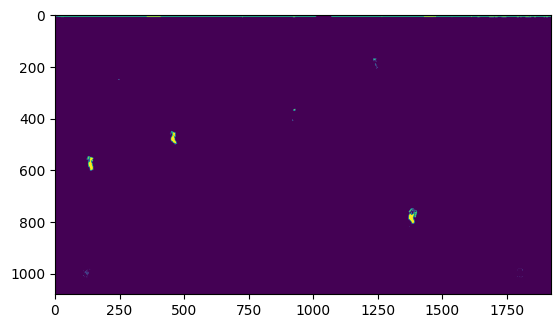

In [ ]:
group2_color_lower =np.array((54,63,136))
group2_color_upper =np.array((100,170,255))
mask_group2 = cv2.inRange(img, group2_color_lower, group2_color_upper)
plt.imshow(mask_group2)
plt.show() # phase4: to remove everyone except team 2


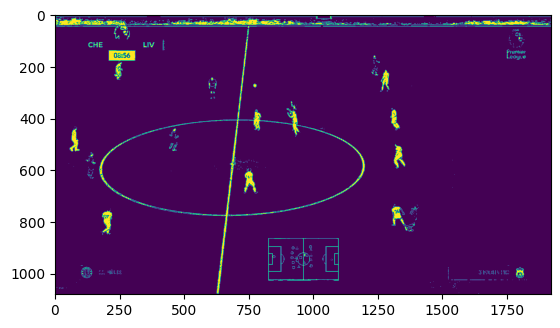

In [ ]:
football_color_lower =np.array((100,30,4))
football_color_upper =np.array((255,200,200))
mask_football= cv2.inRange(img, football_color_lower, football_color_upper)
plt.imshow(mask_football)
plt.show() #to locate the ball

790 295 750 255


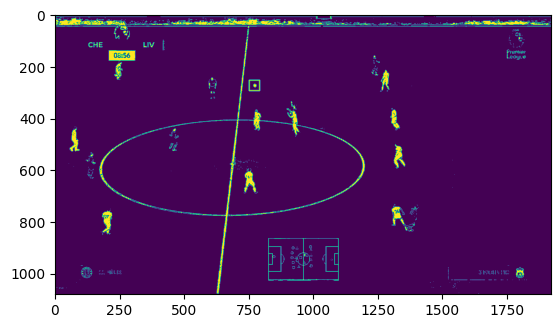

In [ ]:
#put a random range
x=770
y=275
x1 = x+20
y1 = y+20
x2 = x-20
y2 = y-20

print (x1,y1,x2,y2)
cv2.rectangle(mask_football, (x2, y2), (x1, y1), (225, 0, 0), thickness=4)
plt.imshow(mask_football) # put a detector around the ball

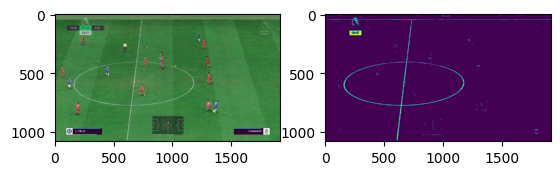

In [ ]:
img2 = cv2.imread('frame2.jpg')
img2= cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
lower = np.array([112, 158, 115])
upper = np.array([179, 208, 183])
mask_img2 = cv2.inRange(img2, lower, upper)
plt.subplot(1, 2, 1)
plt.imshow(img2)
plt.subplot(1, 2, 2)
plt.imshow(mask_img2)
plt.show()# compare frame1 with frame2


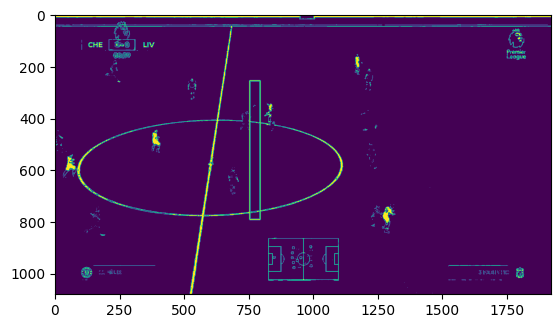

In [ ]:
#Bonus
step = 2
ballSquareSize = 40
threshold = 0.9
targetFrame = 8
pos = (x-20,y-20)
for i in range(1,targetFrame+1):
  img10 = cv2.imread(f'frame{i}.jpg')
  football_color_lower2 =np.array((100,30,4))
  football_color_upper2 =np.array((255,200,200))
  mask_football2= cv2.inRange(img10, football_color_lower2, football_color_upper2)

  up = pos[1] - step
  down = pos[1] + step
  right = pos[0] + step
  left = pos[0] - step

  pixUp = sum(sum(mask_football2[up:up+ballSquareSize,pos[0]:pos[0]+ballSquareSize]))
  pixDown = sum(sum(mask_football2[down:down+ballSquareSize,pos[0]:pos[0]+ballSquareSize]))
  pixRight = sum(sum(mask_football2[pos[1]:pos[1]+ballSquareSize,right:right+ballSquareSize]))
  pixLeft = sum(sum(mask_football2[pos[1]:pos[1]+ballSquareSize,left:left+ballSquareSize]))
  pixUpRight = sum(sum(mask_football2[up:up+ballSquareSize,right:right+ballSquareSize]))
  pixDownRight = sum(sum(mask_football2[down:down+ballSquareSize,right:right+ballSquareSize]))
  pixUpLeft = sum(sum(mask_football2[up:up+ballSquareSize,left:left+ballSquareSize]))
  pixDownLeft = sum(sum(mask_football2[up:up+ballSquareSize,left:left+ballSquareSize]))
  pixCurrent = sum(sum(mask_football2[pos[1]:pos[1]+ballSquareSize,pos[0]:pos[0]+ballSquareSize]))
  maxDensPos = max(pixUp, pixDown, pixRight, pixLeft, pixUpRight,pixDownRight, pixUpLeft, pixDownLeft, pixCurrent )
  if maxDensPos != pixCurrent or (maxDensPos - pixCurrent) > (maxDensPos * threshold):
    if maxDensPos == pixUp:
      pos = (pos[0],up)
    elif maxDensPos == pixDown:
      pos = (pos[0],down)
    elif maxDensPos == pixRight:
      pos = (right,pos[1])
    elif maxDensPos == pixLeft:
      pos = (left,pos[1])
    elif maxDensPos == pixUpRight:
      pos = (right,up)
    elif maxDensPos == pixDownLeft:
      pos = (left,down)
    elif maxDensPos == pixDownRight:
      pos = (right,down)
    elif maxDensPos == pixUpLeft:
      pos = (left,up)
cv2.rectangle(mask_football2, (pos[0], pos[1]), (pos[0]+ballSquareSize, pos[0]+ballSquareSize), (225, 0, 0), thickness=4)
plt.imshow(mask_football2)

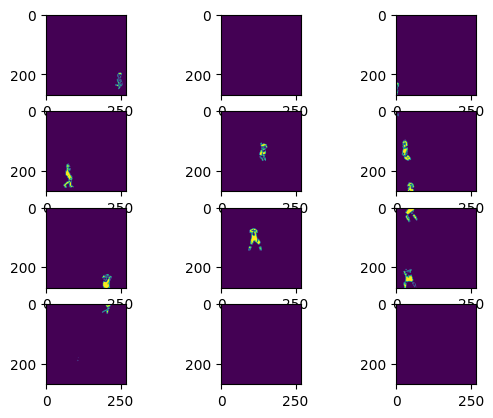

In [ ]:
#Crop the mask if the red players into 12 frame
width_red = mask_group1.shape[1]
cx_red = width_red //3
height_red = mask_group1.shape[0]
cy_red = height_red //4

x_red = 0
y_red = 0
crops_red = []
for i in range(4):
  x_red = 0
  for j in range(3):
    t = mask_group1[y_red:y_red+cy_red , x_red:x_red+cy_red]
    crops_red.append(t)
    x_red = x_red + cx_red
  y_red = y_red + cy_red

for i in range(len(crops_red)):
  plt.subplot(4, 3, i+1)
  plt.imshow(crops_red[i])

In [ ]:
mask_modifed=mask_group2[40:mask_group2.shape[0],:]

In [ ]:
##Calculate the nums of red players and divide over 510 which is the average
no_of_players = 0
for i in range(len(crops_red)):
   ct_white_pixels = 0

   for j in range(crops_red[i].shape[0]):
    for k in range(crops_red[i].shape[1]):
      if crops_red[i][j][k] == 255:
        ct_white_pixels += 1

   no_of_players = ct_white_pixels // 510
   print(f"In crop{i} there is {no_of_players}")




In crop0 there is 0
In crop1 there is 0
In crop2 there is 0
In crop3 there is 1
In crop4 there is 1
In crop5 there is 2
In crop6 there is 1
In crop7 there is 1
In crop8 there is 2
In crop9 there is 0
In crop10 there is 0
In crop11 there is 0


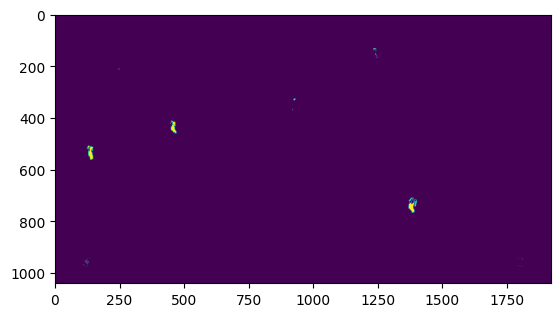

In [ ]:
mask_modifed=mask_group2[40:mask_group2.shape[0],:]
plt.imshow(mask_modifed)
plt.show()

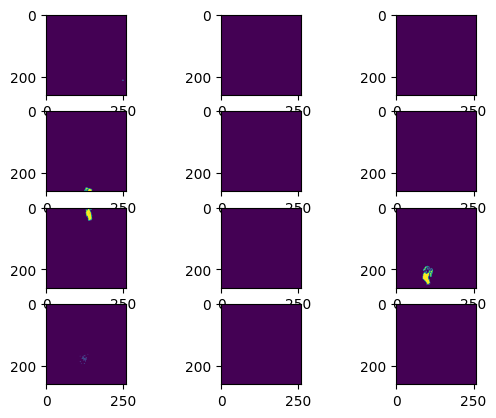

In [ ]:
#Crop the mask if the blue players into 12 frame
width_blue = mask_modifed.shape[1]
cx_blue = width_blue //3
height_blue = mask_modifed.shape[0]
cy_blue = height_blue //4

x_blue = 0
y_blue = 0
crops_blue = []
for i in range(4):
  x_blue = 0
  for j in range(3):
    t = mask_modifed[y_blue:y_blue+cy_blue , x_blue:x_blue+cy_blue]
    crops_blue.append(t)
    x_blue = x_blue + cx_blue
  y_blue = y_blue + cy_blue

for i in range(len(crops_blue)):
  plt.subplot(4, 3, i+1)
  plt.imshow(crops_blue[i])

In [ ]:
#Calculate the nums of blue players and divide over 510 which is the average
no_of_players = 0
for i in range(len(crops_blue)):
   ct_white_pixels = 0

   for j in range(crops_blue[i].shape[0]):
    for k in range(crops_blue[i].shape[1]):
      if crops_blue[i][j][k] == 255:
        ct_white_pixels += 1

   no_of_players = ct_white_pixels // 510
   print(f"In crop{i} there is {no_of_players}")

In crop0 there is 0
In crop1 there is 0
In crop2 there is 0
In crop3 there is 0
In crop4 there is 0
In crop5 there is 0
In crop6 there is 1
In crop7 there is 0
In crop8 there is 1
In crop9 there is 0
In crop10 there is 0
In crop11 there is 0
